In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q datasets sentencepiece

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.

In [2]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.5/592.5 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00


In [3]:
!pip install -U pyarrow polyleven -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 35.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 12.0.0 which is incompatible.


In [4]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import re
from collections import defaultdict
import statistics
import pandas as pd
import json
from glob import glob
from tqdm import tqdm
from polyleven import levenshtein 

In [5]:
import locale 
print(locale.getdefaultlocale())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

('en_US', 'UTF-8')
UTF-8


**Mounted Drive**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!rm -r dataset
!unzip /content/drive/MyDrive/miniProject/benetech-making-graphs-accessible.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/images/eaed09039206.jpg  
  inflating: dataset/train/images/eaed1e245167.jpg  
  inflating: dataset/train/images/eaedb251e670.jpg  
  inflating: dataset/train/images/eaeead418936.jpg  
  inflating: dataset/train/images/eaeeb1c2ecdd.jpg  
  inflating: dataset/train/images/eaef70ba842d.jpg  
  inflating: dataset/train/images/eaf036991cb3.jpg  
  inflating: dataset/train/images/eaf06e9e07db.jpg  
  inflating: dataset/train/images/eaf20f7d8945.jpg  
  inflating: dataset/train/images/eaf3a9a87868.jpg  
  inflating: dataset/train/images/eaf3d05d20a6.jpg  
  inflating: dataset/train/images/eaf3d24fb032.jpg  
  inflating: dataset/train/images/eaf3f734b5ce.jpg  
  inflating: dataset/train/images/eaf467f871a2.jpg  
  inflating: dataset/train/images/eaf65b4e3c45.jpg  
  inflating: dataset/train/images/eaf7f876411a.jpg  
  inflating: dataset/train/images/eafa35356cf8.jpg  
  inflating: dataset/train/images/eafa65caf8e7.j

In [8]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/miniProject/pretrain/best.pt')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-31 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20893344 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


In [9]:
processor = DonutProcessor.from_pretrained("hoangphu7122002ai/donutAxisLine")
model = VisionEncoderDecoderModel.from_pretrained("hoangphu7122002ai/donutAxisLine")

**Metric Benchmark**

In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.subtract(y_true, y_pred))))

def sigmoid(x):
    return 2 - 2 / (1 + np.exp(-x))


def normalized_rmse(y_true, y_pred) -> float:
    numerator = rmse(y_true, y_pred)
    denominator = rmse(y_true, np.mean(y_true))

    if denominator == 0:
        if numerator == 0:
            return 1.0
        return 0.0

    return sigmoid(numerator / denominator)

def normalized_levenshtein_score(y_true, y_pred):
    total_distance = np.sum([levenshtein(yt, yp) for yt, yp in zip(y_true, y_pred)])
    length_sum = np.sum([len(yt) for yt in y_true])
    return sigmoid(total_distance / length_sum)

def score_series(y_true, y_pred):
    if len(y_true) != len(y_pred):
        return 0.0
    if isinstance(y_true[0], str):
        return normalized_levenshtein_score(y_true, y_pred)
    else:
        # Since this is a generative model, there is a chance it doesn't produce a float.
        # In that case, we return 0.0.
        try:
            return normalized_rmse(y_true, list(map(float, y_pred)))
        except:
            return 0.0

**Hyper Parameter**

In [11]:
stoi = {'chart_title': 0, 'axis_title': 1, 'y_tick_label': 2, 'plot-bb': 3, 'x-axis-tick': 4, 'y-axis-tick': 5, 'visual-point': 6, 'tick_label': 7, 'other': 8, 'tick_grouping': 9, 'legend_label': 10}
class_id_to_name_mapping = {v : k for k,v in stoi.items()}

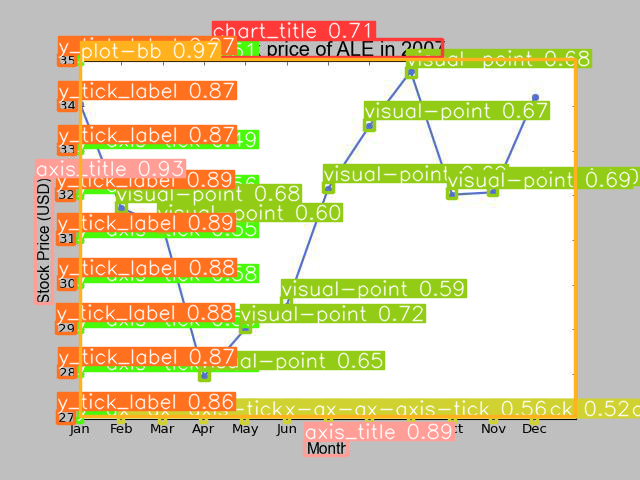

,xmin,ymin,xmax,ymax,confidence,class,name
0,80.579239,59.231339,575.916504,416.011292,0.973641,3,plot-bb
1,35.534103,177.247513,52.168510,303.925110,0.931496,1,axis_title
2,57.587078,231.696030,74.851791,244.064133,0.894800,2,y_tick_label
3,56.998146,188.058990,74.460594,200.027893,0.892996,2,y_tick_label
4,304.221222,440.673401,347.543488,455.148071,0.892830,1,axis_title
5,56.578781,321.870117,75.099350,333.952271,0.884932,2,y_tick_label
6,58.143078,276.950775,75.762878,289.302704,0.879869,2,y_tick_label
7,58.110184,54.044224,75.238815,65.954857,0.872047,2,y_tick_label
8,58.250725,143.094055,75.380379,154.846619,0.871450,2,y_tick_label
9,58.495003,99.383667,76.913048,110.623535,0.868216,2,y_tick_label


In [12]:
im = "/content/dataset/train/images/0003a50817cf.jpg"
results = model_yolo(im)
results.show()
results.pandas().xyxy[0]

In [13]:
annotation_df = results.pandas().xyxy[0]
df_res = annotation_df[['class','xmin','ymin','xmax','ymax']]

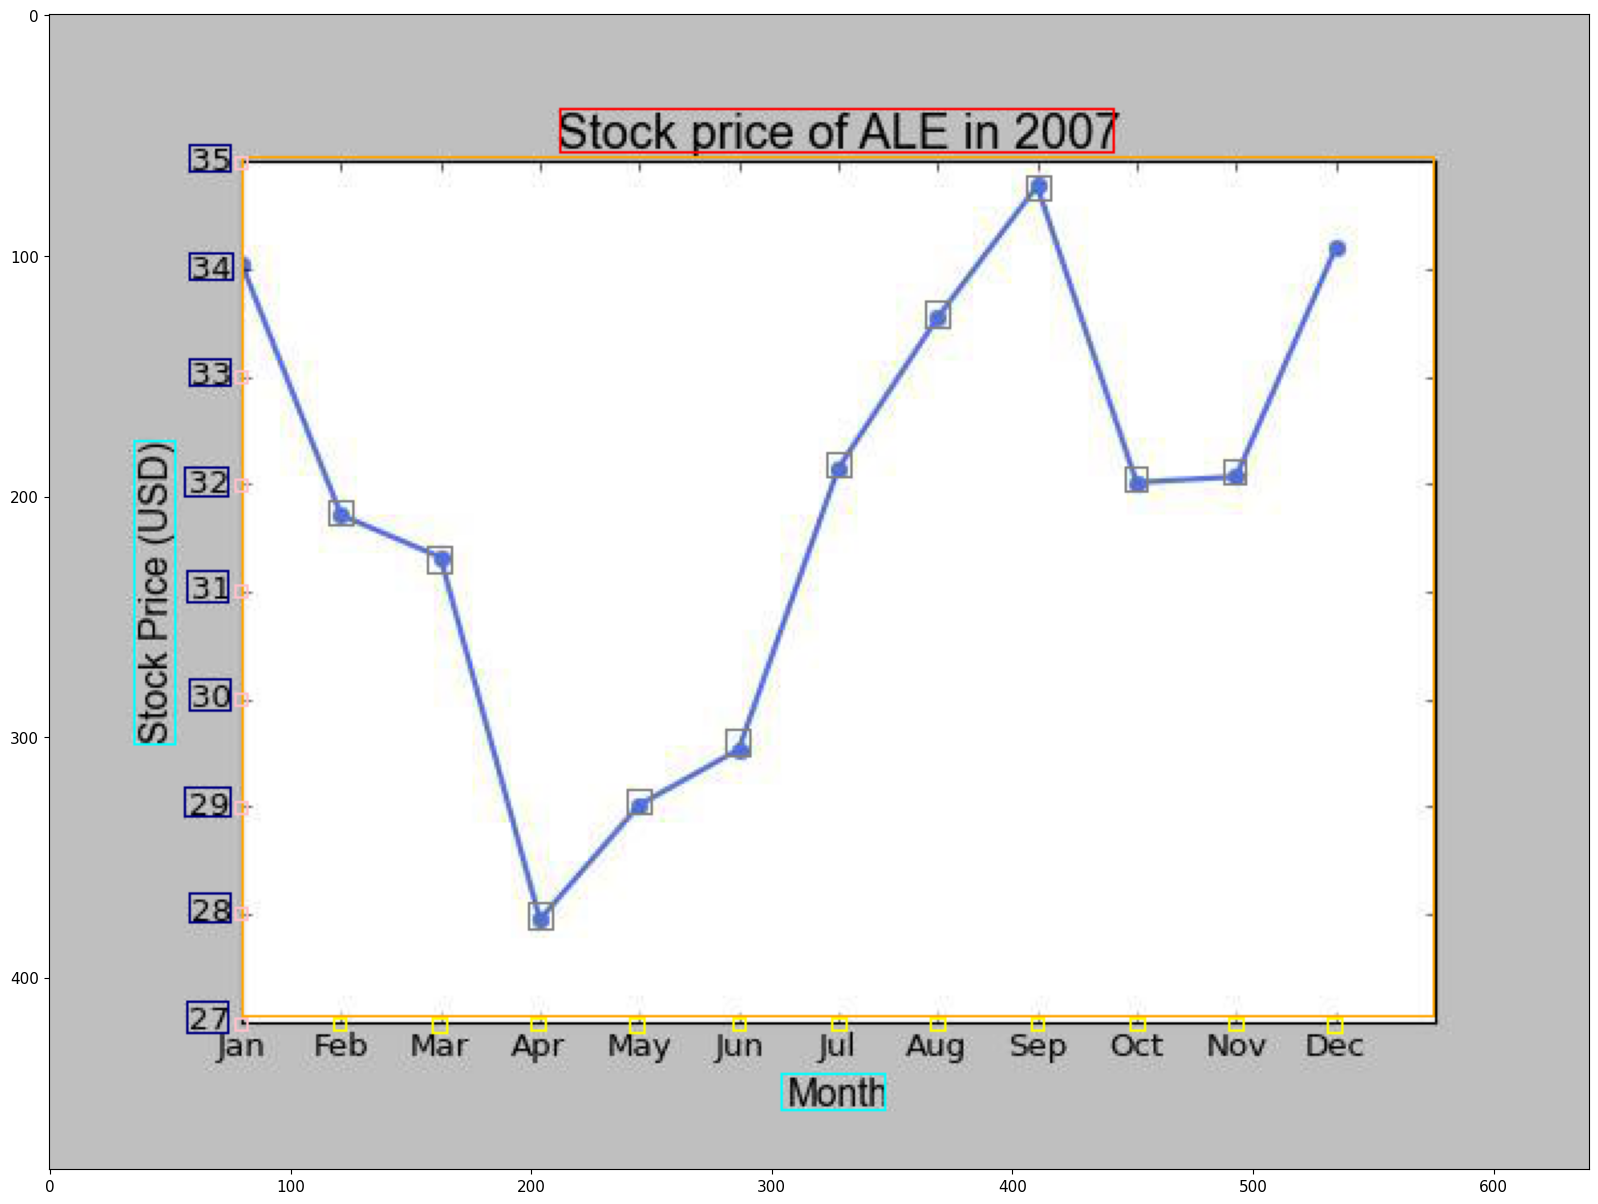

In [14]:
%matplotlib inline
dict_color = {'chart_title' : 'red',
              'axis_title' : 'green',
              'tick_label' : 'blue',
              'plot-bb' : 'orange',
              'x-axis-tick' : 'yellow',
              'y-axis-tick' : 'pink',
              'visual-point' : 'gray',
              'other' : 'brown',
              'tick_grouping' : 'black',
              'axis_title' : 'aqua',
              'y_tick_label' : 'navy'}
plt.rcParams["figure.figsize"] = (20,15)
def plot_bounding_box(image_file, annotation_df):
    image = Image.open(image_file)
    plotted_image = ImageDraw.Draw(image)  
    
    for i,ann in annotation_df.iterrows():
        # obj_cls, x0, y0, w, h = int(ann[0]),int(ann[1]),int(ann[2]),int(ann[3]),int(ann[4])
        obj_cls, x0, y0, x1, y1 = ann.to_list()
        # print(x0,y0,x1,y1)
        plotted_image.rectangle(((x0,y0), (x1,y1)),outline = dict_color[class_id_to_name_mapping[obj_cls]])
    
    plt.imshow(np.array(image))
    plt.show()
plot_bounding_box("/content/dataset/train/images/0003a50817cf.jpg",df_res)

**Model Text**

In [15]:
def module_text(image_path):
    image = Image.open(image_path)
    pixel_values = processor(image, return_tensors="pt").pixel_values

    task_prompt = "<|PROMPT|>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    outputs = model.generate(pixel_values.to(device),
                                  decoder_input_ids=decoder_input_ids.to(device),
                                  max_length=model.decoder.config.max_position_embeddings,
                                  early_stopping=True,
                                  pad_token_id=processor.tokenizer.pad_token_id,
                                  eos_token_id=processor.tokenizer.eos_token_id,
                                  use_cache=True,
                                  num_beams=1,
                                  bad_words_ids=[[processor.tokenizer.unk_token_id]],
                                  return_dict_in_generate=True,
                                  output_scores=True,)

    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.decode([model.config.decoder_end_token_id]), "").replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
    sequence = re.sub(r"<one>", "1", sequence)
    sequence = re.sub(r"(?:(?<=>) | (?=</s_))", "", sequence)
    sequence = sequence.split('<tick_label_y_end>')[0] + '<tick_label_y_end>'
    x_tick_label_mark = sequence.split('<tick_label_x_start>')[1].split('<tick_label_x_end>')[0].split(";")
    y_tick_label_mark = sequence.split('<tick_label_y_start>')[1].split('<tick_label_y_end>')[0].split(";")
    chart_title_mark = sequence.split('<chart_title_start>')[1].split('<chart_title_end>')[0].split(";")
    x_axis_title_mark = sequence.split('<axis_title_x_start>')[1].split('<axis_title_x_end>')[0].split(";")
    y_axis_title_mark = sequence.split('<axis_title_y_start>')[1].split('<axis_title_y_end>')[0].split(";")

    return {
        'x_tick_label_mark' : x_tick_label_mark,
        'y_tick_label_mark' : y_tick_label_mark,
        'chart_title_mark' : chart_title_mark,
        'x_axis_title_mark' : x_axis_title_mark,
        'y_axis_title_mark' : y_axis_title_mark
    }

In [16]:
module_text('/content/dataset/train/images/0003a50817cf.jpg')

{'x_tick_label_mark': ['Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Jul',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec'],
 'y_tick_label_mark': ['35', '34', '33', '32', '31', '30', '29', '28', '27'],
 'chart_title_mark': ['Stock price of ALE in 2007'],
 'x_axis_title_mark': ['Month'],
 'y_axis_title_mark': ['Stock Price (USD)']}

**Model detection**

In [17]:
def module_bb(image_path):
    results = model_yolo(image_path)
    df = results.pandas().xyxy[0]
    df = df[['class','xmin','ymin','xmax','ymax']]

    dict_res = defaultdict(list)
    for i,ann in df.iterrows():
        list_res = ann.to_list()
        label = class_id_to_name_mapping[list_res[0]]
        dict_res[label].append(list_res[1:])

    return dict_res

In [ ]:
module_bb('/content/dataset/train/images/0003a50817cf.jpg')

**Module extraction**

In [19]:
text_res = module_text('/content/dataset/train/images/0003a50817cf.jpg')
bb_res = module_bb('/content/dataset/train/images/0003a50817cf.jpg')

In [20]:
bb_res.keys()

dict_keys(['plot-bb', 'axis_title', 'y_tick_label', 'visual-point', 'chart_title', 'y-axis-tick', 'x-axis-tick'])

In [21]:
text_res

{'x_tick_label_mark': ['Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Jul',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec'],
 'y_tick_label_mark': ['35', '34', '33', '32', '31', '30', '29', '28', '27'],
 'chart_title_mark': ['Stock price of ALE in 2007'],
 'x_axis_title_mark': ['Month'],
 'y_axis_title_mark': ['Stock Price (USD)']}

In [108]:
lm_x = np.mean([ele[3] for ele in bb_res['x-axis-tick']])
lm_y = np.mean([ele[0] for ele in bb_res['y-axis-tick']])

In [110]:
lm_x
lm_y

77.52622127532959

In [22]:
x0_mark = bb_res['plot-bb'][0][0]
y0_mark = bb_res['plot-bb'][0][1]
x1_mark = bb_res['plot-bb'][0][2]
y1_mark = bb_res['plot-bb'][0][3]

y_label = bb_res['y_tick_label']
y_label = sorted(y_label,key = lambda x : x[2] * x[3])

x_tick = sorted(bb_res['x-axis-tick'],key = lambda x : x[0] * x[1])
y_tick = sorted(bb_res['y-axis-tick'],key = lambda x : x[2] * x[3])

In [55]:
print(len(y_label))
print(len(y_tick))
y1_mark = bb_res['plot-bb'][0][3]

9
8


In [24]:
x_tick_label_mark = text_res['x_tick_label_mark']
y_tick_label_mark = text_res['y_tick_label_mark']

In [27]:
len(y_tick_label_mark)

9

In [25]:
len(x_tick_label_mark)

12

In [64]:
def get_extract_range(test_lst):
    Q1 = np.percentile(test_lst, 25, method='midpoint')
    Q3 = np.percentile(test_lst, 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    return np.mean([ele for ele in test_lst if ele >= lower and ele <= upper])

In [28]:
dy_mark_lst = [float(y_tick_label_mark[i]) - float(y_tick_label_mark[i - 1]) for i in range(1,len(y_tick_label_mark))]

In [29]:
dy_mark = statistics.mode(dy_mark_lst)

In [30]:
dy_pixel_lst = [(y_tick[i][1] + y_tick[i][3])/2 - (y_tick[i-1][1] + y_tick[i-1][3])/2 for i in range(1,len(y_tick))] 
    
dy_p_mark = int(get_extract_range(dy_pixel_lst))

In [31]:
dy_p_mark
scale_y = abs(dy_mark / dy_p_mark)

**Aggregate If multiple marker in one marker**

In [32]:
dx_pixel_lst = [(x_tick[i][0] + x_tick[i][2])/2 - (x_tick[i-1][0] + x_tick[i-1][2])/2 for i in range(1,len(x_tick))] 
dx_p_mark = int(get_extract_range(dx_pixel_lst))

In [33]:
dx_pixel_lst

[41.445106506347656,
 40.91746520996094,
 41.47682189941406,
 42.25616455078125,
 41.517364501953125,
 40.471588134765625,
 41.759246826171875,
 41.812286376953125,
 40.71649169921875,
 41.417877197265625]

In [34]:
x_tick_label_mark

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [35]:
visual_point = bb_res['visual-point']

In [36]:
from functools import cmp_to_key
 
def compare(pair1, pair2):
    x1, y1 = pair1
    x2, y2 = pair2
    if x1 > x2: return 1
    if x1 < x2: return -1
    if y1 > y2: return 1
    return -1
 
compare_key = cmp_to_key(compare)

In [37]:
visual_point = [[(point[0] + point[2])/2, (point[1] + point[3])/2] for point in visual_point]
visual_point = sorted(visual_point,key = compare_key)

In [38]:
visual_point

[[121.38330078125, 207.76986694335938],
 [162.40365600585938, 227.08547973632812],
 [204.239501953125, 374.84674072265625],
 [245.44952392578125, 327.83074951171875],
 [286.7063293457031, 302.8544616699219],
 [328.4640808105469, 187.0669403076172],
 [369.1236572265625, 125.01639175415039],
 [411.3907775878906, 72.52421569824219],
 [451.9572448730469, 193.3140106201172],
 [493.09747314453125, 190.58602905273438]]

In [39]:
def agg_point(visual_point, dx_p_mark):
    label = [0]
    for i in range(1,len(visual_point)):
      if abs(visual_point[i][0] - visual_point[i-1][0]) > (dx_p_mark/2):
        label.append(label[i-1] + 1)
      else:
        label.append(label[i-1])
    
    sum_x = visual_point[0][0]
    sum_y = visual_point[0][1]
    len_ = 1
    new_point = []
    for i in range(1,len(label)):
        if label[i] == label[i - 1]:
          sum_x += visual_point[i][0]
          sum_y += visual_point[i][1]
          len_ += 1
        else:
          x = sum_x / len_
          y = sum_y / len_
          new_point.append([x,y])
          sum_x = visual_point[i][0]
          sum_y = visual_point[i][1]
          len_ = 1
    x = sum_x / len_
    y = sum_y / len_
    new_point.append([x,y])
    return new_point


In [40]:
new_point = agg_point(visual_point,dx_p_mark)

In [41]:
new_point

[[121.38330078125, 207.76986694335938],
 [162.40365600585938, 227.08547973632812],
 [204.239501953125, 374.84674072265625],
 [245.44952392578125, 327.83074951171875],
 [286.7063293457031, 302.8544616699219],
 [328.4640808105469, 187.0669403076172],
 [369.1236572265625, 125.01639175415039],
 [411.3907775878906, 72.52421569824219],
 [451.9572448730469, 193.3140106201172],
 [493.09747314453125, 190.58602905273438]]

In [42]:
len(new_point)

10

**Inference empty position**

In [46]:
dx_pixel_lst

[41.445106506347656,
 40.91746520996094,
 41.47682189941406,
 42.25616455078125,
 41.517364501953125,
 40.471588134765625,
 41.759246826171875,
 41.812286376953125,
 40.71649169921875,
 41.417877197265625]

In [56]:
y1_mark = max(y1_mark,np.mean([(point[1] + point[3])/2 for point in x_tick]))

In [57]:
y1_mark

420.13660222833806

In [58]:
new_point

[[121.38330078125, 207.76986694335938],
 [162.40365600585938, 227.08547973632812],
 [204.239501953125, 374.84674072265625],
 [245.44952392578125, 327.83074951171875],
 [286.7063293457031, 302.8544616699219],
 [328.4640808105469, 187.0669403076172],
 [369.1236572265625, 125.01639175415039],
 [411.3907775878906, 72.52421569824219],
 [451.9572448730469, 193.3140106201172],
 [493.09747314453125, 190.58602905273438]]

In [60]:
[[(point[0] + point[2])/2,(point[1] + point[3])/2] for point in x_tick]

[[121.03990936279297, 420.0115661621094],
 [162.48501586914062, 420.24053955078125],
 [203.40248107910156, 420.19146728515625],
 [244.87930297851562, 420.26568603515625],
 [287.1354675292969, 420.1771545410156],
 [328.65283203125, 420.091064453125],
 [369.1244201660156, 419.947998046875],
 [410.8836669921875, 420.1218566894531],
 [452.6959533691406, 420.19232177734375],
 [493.4124450683594, 419.8687438964844],
 [534.830322265625, 420.39422607421875]]

In [63]:
def get_range(test_lst):
    Q1 = np.percentile(test_lst, 25, method='midpoint')
    Q3 = np.percentile(test_lst, 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    return lower, upper

In [65]:
lower_x, upper_x = get_range(dx_pixel_lst)

In [92]:
def inference_empty_tick(x_tick,dx_pixel_lst):
    lower_x, upper_x = get_range(dx_pixel_lst)
    new_x_tick = [x_tick[0]]
    for i in range(len(dx_pixel_lst)):
      if dx_pixel_lst[i] >= lower_x and dx_pixel_lst[i] <= upper_x:
        new_x_tick.append(x_tick[i + 1])
      else:
        new_point_tick = [(x_tick[i + 1][j] + x_tick[i][j])/2 for j in range(len(x_tick[i + 1]))]
        new_x_tick.append(new_point_tick)
        new_x_tick.append(x_tick[i + 1])
    return new_x_tick

In [93]:
new_y_tick = inference_empty_tick(y_tick,dy_pixel_lst)

In [96]:
new_x_tick = inference_empty_tick(x_tick,dx_pixel_lst)

In [111]:
print(lm_x,lm_y)

422.9349337491122 77.52622127532959


In [113]:
if len(new_x_tick) == len(x_tick_label_mark) - 1:
  new_tick_point = [new_x_tick[0][0] - dx_p_mark,new_x_tick[0][1], new_x_tick[0][2] - dx_p_mark, new_x_tick[0][3]]
  if new_tick_point[2] >= lm_y:
    #begin
    new_x_tick = [new_tick_point] + new_x_tick
  else:
    #last
    new_x_tick.append([new_x_tick[-1][0] + dx_p_mark,new_x_tick[-1][1], new_x_tick[-1][2] + dx_p_mark, new_x_tick[-1][3]])
elif len(new_x_tick) == len(x_tick_label_mark) - 2:
  new_tick_point = [new_x_tick[0][0] - dx_p_mark,new_x_tick[0][1], new_x_tick[0][2] - dx_p_mark, new_x_tick[0][3]]
  new_last_point = [new_x_tick[-1][0] + dx_p_mark,new_x_tick[-1][1], new_x_tick[-1][2] + dx_p_mark, new_x_tick[-1][3]]
  new_x_tick = [new_tick_point] + new_x_tick + [new_last_point]

In [115]:
len(new_x_tick)

12

**Define empty point in visualPoint**

In [119]:
new_point[0]

[121.38330078125, 207.76986694335938]

In [120]:
from copy import deepcopy

In [224]:
new_point_lst = {}
lst_pos_empty = []
begin = 0
for i in range(len(new_x_tick)):
  tick_x_point = (new_x_tick[i][0] + new_x_tick[i][2])/2
  if begin == len(new_point):
    while i < len(new_x_tick):
      lst_pos_empty.append(deepcopy(i))
      i += 1
    break
  if abs(new_point[begin][0] - tick_x_point) > (dx_p_mark/2):
    lst_pos_empty.append(deepcopy(i))
  else:
    new_point_lst[i] = new_point[begin]
    begin += 1

In [132]:
lst_pos_empty

[0, 11]

**Find pixel color in bb**

In [137]:
image = Image.open('/content/dataset/train/images/0003a50817cf.jpg')
img_np = np.array(image)

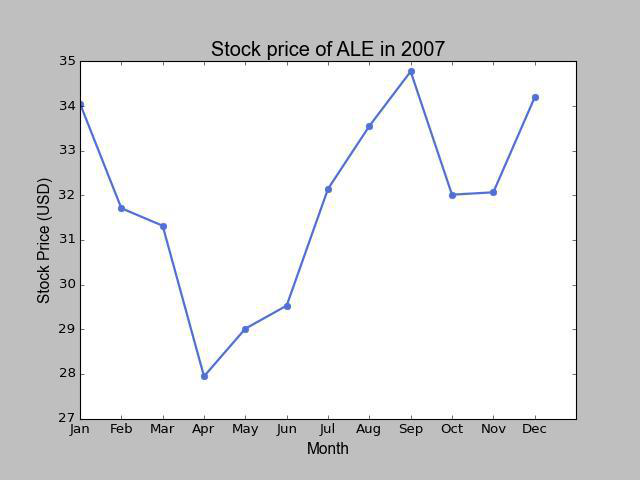

In [141]:
image

In [140]:
img_np.shape

(480, 640, 3)

In [171]:
imgGray = np.array(image.convert('L'))

In [172]:
imgGray

array([[191, 191, 191, ..., 191, 191, 191],
       [191, 191, 191, ..., 191, 191, 191],
       [191, 191, 191, ..., 191, 191, 191],
       ...,
       [191, 191, 191, ..., 191, 191, 191],
       [191, 191, 191, ..., 191, 191, 191],
       [191, 191, 191, ..., 191, 191, 191]], dtype=uint8)

In [180]:
lst_color = []

for point_set in tqdm(new_point):
    dx = int(point_set[0])
    dy = int(point_set[1])
    for i in range(dx - 2,dx + 2):
      for j in range(dy - 2,dy + 2):
        if imgGray[j][i] > 220:
          continue
        lst_color.append(imgGray[j][i])

100%|██████████| 10/10 [00:00<00:00, 8190.40it/s]


In [187]:
lower,upper = get_range(lst_color)

In [230]:
def inference_empty_point(new_x_tick,lst_pos_empty,lower_c,upper_c,imgGray,new_point_list):
  # new_point_list = {}
  for pt in lst_pos_empty:
    pt_set = new_x_tick[pt]
    for j in reversed(range(-2,10)):
      dx = int(pt_set[0])
      dy = int(pt_set[1])
      while dy >= 0:
        if imgGray[dy][dx + j] >= lower and imgGray[dy][dx+j] <= upper:
          break
        dy -= 1
      if dy != -1:
        new_point_list[pt] = [dx,dy]
        break
  return new_point_list

In [232]:
final_point = inference_empty_point(new_x_tick,lst_pos_empty,lower,upper,imgGray,new_point_lst)

In [234]:
y_tick_label_mark

['35', '34', '33', '32', '31', '30', '29', '28', '27']

In [236]:
print(dy_p_mark)
scale_y = abs(dy_mark / dy_p_mark)

44


In [238]:
print(scale_y)

dy_mark

0.022727272727272728


-1.0

In [243]:
final_point = {k: v for k, v in sorted(final_point.items(), key=lambda item: item[0])}

In [244]:
final_point

{0: [77, 122],
 1: [121.38330078125, 207.76986694335938],
 2: [162.40365600585938, 227.08547973632812],
 3: [204.239501953125, 374.84674072265625],
 4: [245.44952392578125, 327.83074951171875],
 5: [286.7063293457031, 302.8544616699219],
 6: [328.4640808105469, 187.0669403076172],
 7: [369.1236572265625, 125.01639175415039],
 8: [411.3907775878906, 72.52421569824219],
 9: [451.9572448730469, 193.3140106201172],
 10: [493.09747314453125, 190.58602905273438],
 11: [531, 98]}

In [246]:
y_val = []
for k,point_y in final_point.items():
    est_y = (y1_mark - point_y[1]) * scale_y

    if dy_mark > 0: #val duong
        y = float(y_tick_label_mark[-1]) - est_y
    else: y = float(y_tick_label_mark[-1]) + est_y
    y_val.append(y)

In [247]:
y_val

[33.77583186882587,
 31.826516711022244,
 31.387525511182044,
 28.02931503422004,
 29.097860289014076,
 29.66550319450946,
 32.29703777092548,
 33.70727751077699,
 34.900281512047634,
 32.15505890018684,
 32.21705848126372,
 34.32128641428041]

In [248]:
x_tick_label_mark

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [253]:
x_axis_title_mark = text_res['x_axis_title_mark'][0]
y_axis_title_mark = text_res['y_axis_title_mark'][0]

In [255]:
final_res = pd.DataFrame([[x,y] for x,y in zip(x_tick_label_mark,y_val)])
final_res.columns = [x_axis_title_mark,y_axis_title_mark]
final_res

,Month,Stock Price (USD)
0,Jan,33.775832
1,Feb,31.826517
2,Mar,31.387526
3,Apr,28.029315
4,May,29.097860
5,Jun,29.665503
6,Jul,32.297038
7,Aug,33.707278
8,Sep,34.900282
9,Oct,32.155059
